In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
import time

In [2]:
iris = pd.read_csv("iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [3]:
iris[0:10]

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["class"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
iris_setosa=iris.loc[iris["class"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["class"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["class"]=="Iris-versicolor"]

In [6]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print("WCSS score for ", i, " cluster is ", kmeans.inertia_)

WCSS score for  1  cluster is  680.8244
WCSS score for  2  cluster is  152.36870647733906
WCSS score for  3  cluster is  78.94084142614602
WCSS score for  4  cluster is  57.345409315718165
WCSS score for  5  cluster is  46.53558205128205
WCSS score for  6  cluster is  38.93873974358974
WCSS score for  7  cluster is  34.19068792479662
WCSS score for  8  cluster is  29.905374299825105
WCSS score for  9  cluster is  27.927882157034972
WCSS score for  10  cluster is  25.95549708624709


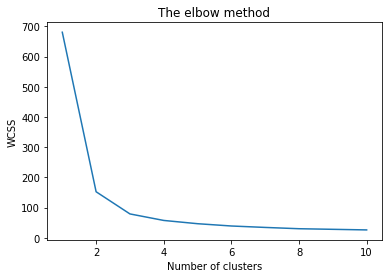

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.savefig('elbowiris.png')
plt.show()

# 3 Clusters

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [9]:
KM_clustered = x.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans.labels_ # append labels to points

frames = [iris['class'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

(150, 2)


,class,Cluster
96,Iris-versicolor,2
43,Iris-setosa,1
118,Iris-virginica,0
45,Iris-setosa,1
12,Iris-setosa,1


In [10]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 Iris-virginica
1 Iris-setosa
2 Iris-versicolor


In [11]:
# Check performance of classification to 3 clusters

print('K-Means performance')
print('-'*60)

Correct = (iris['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/iris.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(iris['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(iris['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(iris['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(iris['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(iris['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

K-Means performance
------------------------------------------------------------
Accuracy  0.893
silhouette:  0.735
homogeneity_score:  0.751
completeness_score:  0.765
v_measure_score:  0.758
adjusted_rand_score:  0.73
adjusted_mutual_info_score:  0.755
davies bouldin score:  0.662
calinsku harabasz score:  560.4


In [12]:
pd.crosstab(iris["class"],kmeans.labels_)

col_0,0,1,2
class,,,
Iris-setosa,0,50,0
Iris-versicolor,2,0,48
Iris-virginica,36,0,14


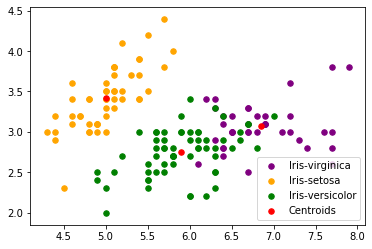

In [13]:
#Visualising the clusters
plt.figure(figsize=(6,4))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'purple', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-versicolor')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'red', label = 'Centroids')
plt.legend()
plt.savefig('iris_rectangle.png')


# Elkan Algorithm

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, algorithm="elkan")
y_kmeans = kmeans.fit_predict(x)

In [15]:
KM_clustered = x.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans.labels_ # append labels to points

frames = [iris['class'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

(150, 2)


,class,Cluster
68,Iris-versicolor,2
61,Iris-versicolor,2
2,Iris-setosa,1
63,Iris-versicolor,2
112,Iris-virginica,0


In [16]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 Iris-virginica
1 Iris-setosa
2 Iris-versicolor


In [17]:
# Check performance of classification to 3 clusters

print('K-Means performance')
print('-'*60)

Correct = (iris['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/iris.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(iris['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(iris['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(iris['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(iris['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(iris['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

K-Means performance
------------------------------------------------------------
Accuracy  0.893
silhouette:  0.735
homogeneity_score:  0.751
completeness_score:  0.765
v_measure_score:  0.758
adjusted_rand_score:  0.73
adjusted_mutual_info_score:  0.755
davies bouldin score:  0.662
calinsku harabasz score:  560.4


# n_init = 1

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1, n_init = 1, random_state = 3)
y_kmeans = kmeans.fit_predict(x)

In [19]:
KM_clustered = x.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans.labels_ # append labels to points

frames = [iris['class'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

(150, 2)


,class,Cluster
66,Iris-versicolor,1
15,Iris-setosa,0
104,Iris-virginica,2
69,Iris-versicolor,1
59,Iris-versicolor,1


In [20]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 Iris-setosa
1 Iris-versicolor
2 Iris-virginica


In [21]:
# Check performance of classification to 3 clusters

print('K-Means performance')
print('-'*60)

Correct = (iris['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/iris.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(iris['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(iris['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(iris['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(iris['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(iris['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

K-Means performance
------------------------------------------------------------
Accuracy  0.813
silhouette:  0.698
homogeneity_score:  0.67
completeness_score:  0.737
v_measure_score:  0.702
adjusted_rand_score:  0.605
adjusted_mutual_info_score:  0.698
davies bouldin score:  0.649
calinsku harabasz score:  483.337


# Random Initialization

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 1, n_init = 1, random_state = 100)
y_kmeans = kmeans.fit_predict(x)

In [23]:
KM_clustered = x.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans.labels_ # append labels to points

frames = [iris['class'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

(150, 2)


,class,Cluster
112,Iris-virginica,2
116,Iris-virginica,2
134,Iris-virginica,2
81,Iris-versicolor,0
52,Iris-versicolor,2


In [24]:
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 Iris-versicolor
1 Iris-setosa
2 Iris-virginica


In [25]:
# Check performance of classification to 3 clusters

print('K-Means performance')
print('-'*60)

Correct = (iris['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/iris.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(iris['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(iris['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(iris['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(iris['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(iris['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

K-Means performance
------------------------------------------------------------
Accuracy  0.84
silhouette:  0.664
homogeneity_score:  0.7
completeness_score:  0.745
v_measure_score:  0.722
adjusted_rand_score:  0.642
adjusted_mutual_info_score:  0.718
davies bouldin score:  0.634
calinsku harabasz score:  484.899


# Mini Batch

In [26]:
# Create k-mean object
clustering = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=50)

# Train model
model = clustering.fit(x)

In [27]:
pd.crosstab(iris["class"],model.labels_)

col_0,0,1,2
class,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,15,0,35


In [28]:
# Mini Batch K-Means Clustering

sc = MiniBatchKMeans(n_clusters = 3)
sc.fit(x)
labels = sc.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

Clustered = x.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = sc.labels_ # append labels to points
#Clustered.sample(5)

frames = [iris['class'], Clustered['Cluster']]
result = pd.concat(frames, axis = 1)
#print(result.shape)
#result.sample(5)
for ClusterNum in range(3):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

number of estimated clusters : 3
0 Iris-versicolor
1 Iris-setosa
2 Iris-virginica


In [29]:
# Check performance of classification to 3 clusters

print('Mini Batch K-Means clustering performance')
print('-'*60)

Correct = (iris['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/iris.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(iris['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(iris['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(iris['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(iris['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(iris['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

Mini Batch K-Means clustering performance
------------------------------------------------------------
Accuracy  0.887
silhouette:  0.734
homogeneity_score:  0.736
completeness_score:  0.747
v_measure_score:  0.742
adjusted_rand_score:  0.716
adjusted_mutual_info_score:  0.739
davies bouldin score:  0.634
calinsku harabasz score:  484.899


# Spiral Dataset

In [30]:
spiral = pd.read_csv("spiral.csv")
x = spiral.iloc[:, [0, 1]].values

In [31]:
# iris.info()
spiral[0:5]

,2,1,class
0,0.500000,0.907692,0
1,0.578786,0.896086,0
2,0.653073,0.869552,0
3,0.720091,0.829390,0
4,0.777403,0.777403,0


In [32]:
#Frequency distribution of species"
spiral_outcome = pd.crosstab(index=spiral["class"],  # Make a crosstab
                              columns="count")      # Name the count column

spiral_outcome

col_0,count
class,
0,97
1,97


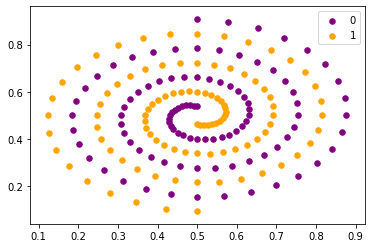

In [33]:
#Visualising the clusters
plt.scatter(x[spiral["class"] == 0, 0], x[spiral["class"] == 0, 1], s = 30, c = 'purple', label = '0')
plt.scatter(x[spiral["class"] == 1, 0], x[spiral["class"] == 1, 1], s = 30, c = 'orange', label = '1')

plt.legend()
plt.savefig('spiralgt.png')

In [34]:
spiral_0=spiral.loc[spiral["class"]==0]
spiral_1=spiral.loc[spiral["class"]==1]

In [35]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print("WCSS score for ", i, " cluster is ", kmeans.inertia_)

WCSS score for  1  cluster is  11.90402053842929
WCSS score for  2  cluster is  7.774832893146352
WCSS score for  3  cluster is  5.269182229641045
WCSS score for  4  cluster is  3.9501407985917174
WCSS score for  5  cluster is  3.2132376319906553
WCSS score for  6  cluster is  2.601640477385388
WCSS score for  7  cluster is  2.2096959693977336
WCSS score for  8  cluster is  1.9552753871407433
WCSS score for  9  cluster is  1.7343015955587782
WCSS score for  10  cluster is  1.5330601104537371


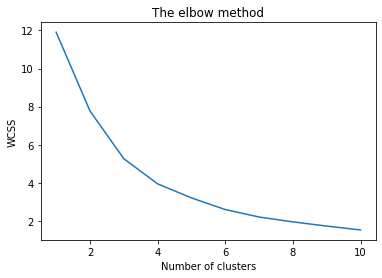

In [36]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.savefig('spiralelbow2.png')
plt.show()


# 4 clusters

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [38]:
pd.crosstab(spiral["class"],kmeans.labels_)

col_0,0,1,2,3
class,,,,
0,22,27,28,20
1,21,29,26,21


In [39]:
KM_clustered = x.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans.labels_ # append labels to points

frames = [spiral['class'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

(194, 2)


,class,Cluster
73,0,1
46,0,1
83,0,3
59,0,2
37,0,0


In [40]:
for ClusterNum in range(4):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 0
1 1
2 0
3 1


In [41]:
# Check performance of classification to 3 clusters

print('K-Means performance')
print('-'*60)

Correct = (spiral['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/spiral.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(spiral['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(spiral['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(spiral['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(spiral['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(spiral['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

K-Means performance
------------------------------------------------------------
Accuracy  0.515
silhouette:  0.435
homogeneity_score:  0.001
completeness_score:  0.001
v_measure_score:  0.001
adjusted_rand_score:  -0.004
adjusted_mutual_info_score:  -0.003
davies bouldin score:  0.915
calinsku harabasz score:  127.526


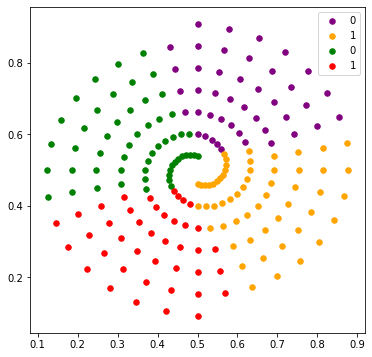

In [42]:
#Visualising the clusters
plt.figure(figsize=(6,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'purple', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'orange', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'green', label = '0')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 30, c = 'red', label = '1')

plt.legend()
# plt.savefig('spiral_square.png')

# n_init = 1

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1, n_init = 1, random_state = 3)
y_kmeans = kmeans.fit_predict(x)

In [44]:
KM_clustered = x.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans.labels_ # append labels to points

frames = [spiral['class'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

(194, 2)


,class,Cluster
21,0,1
18,0,1
106,1,3
144,1,3
3,0,0


In [45]:
for ClusterNum in range(4):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 0
1 1
2 0
3 1


In [46]:
# Check performance of classification to 3 clusters

print('K-Means performance')
print('-'*60)

Correct = (spiral['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/spiral.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(spiral['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(spiral['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(spiral['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(spiral['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(spiral['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

K-Means performance
------------------------------------------------------------
Accuracy  0.541
silhouette:  0.41
homogeneity_score:  0.005
completeness_score:  0.005
v_measure_score:  0.005
adjusted_rand_score:  0.002
adjusted_mutual_info_score:  0.001
davies bouldin score:  0.915
calinsku harabasz score:  111.932


# Random Initialization

In [47]:
kmeans = KMeans(n_clusters = 4, init = 'random', max_iter = 1, n_init = 1, random_state = 100)
y_kmeans = kmeans.fit_predict(x)

In [48]:
KM_clustered = x.copy()
KM_clustered = pd.DataFrame(KM_clustered)
KM_clustered.loc[:,'Cluster'] = kmeans.labels_ # append labels to points

frames = [spiral['class'], KM_clustered['Cluster']]
result = pd.concat(frames, axis = 1)
print(result.shape)
result.sample(5)

(194, 2)


,class,Cluster
54,0,3
39,0,0
108,1,3
105,1,3
61,0,3


In [49]:
for ClusterNum in range(4):

    OneCluster = pd.DataFrame(result[result['Cluster'] == ClusterNum].groupby('class').size())
    OneCluster.columns=['Size']
    
    NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
    NewDigit[0]

    rowIndex = result.index[result['Cluster'] == ClusterNum]
    result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
    
    print(ClusterNum, NewDigit[0])

0 0
1 1
2 0
3 1


In [50]:
# Check performance of classification to 3 clusters

print('K-Means performance')
print('-'*60)

Correct = (spiral['class'] == result['TransLabel']).sum()
Accuracy = round(Correct/spiral.shape[0],3)
print('Accuracy ', Accuracy)

# METRICS for clustering algorithms

print('silhouette: ', round(metrics.silhouette_score(x, result['TransLabel'],metric='sqeuclidean'),3))
print('homogeneity_score: ', round(metrics.homogeneity_score(spiral['class'], result['TransLabel']),3))
print('completeness_score: ', round(metrics.completeness_score(spiral['class'], result['TransLabel']),3))
print('v_measure_score: ', round(metrics.v_measure_score(spiral['class'], result['TransLabel']),3))
print('adjusted_rand_score: ', round(metrics.adjusted_rand_score(spiral['class'], result['TransLabel']),3))
print('adjusted_mutual_info_score: ', round(metrics.adjusted_mutual_info_score(spiral['class'], result['TransLabel']),3))
print('davies bouldin score: ', round(metrics.davies_bouldin_score(x, kmeans.labels_), 3))
print('calinsku harabasz score: ', round(metrics.calinski_harabasz_score(x, kmeans.labels_), 3))

K-Means performance
------------------------------------------------------------
Accuracy  0.546
silhouette:  0.399
homogeneity_score:  0.006
completeness_score:  0.007
v_measure_score:  0.007
adjusted_rand_score:  0.004
adjusted_mutual_info_score:  0.003
davies bouldin score:  1.077
calinsku harabasz score:  101.857
